In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Directorios de las imágenes
good_apple_dir = '/content/drive/MyDrive/Machine learning/Final/Manzanas/Manzanas/ManzanaBuena'
bad_apple_dir = '/content/drive/MyDrive/Machine learning/Final/Manzanas/Manzanas/ManzanaMala'

In [4]:
# Cargar y preprocesar imágenes
def load_images_from_directory(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255.0  # Normalizar las imágenes
        images.append(img)
        labels.append(label)
    return images, labels

good_images, good_labels = load_images_from_directory(good_apple_dir, 0)
bad_images, bad_labels = load_images_from_directory(bad_apple_dir, 1)

X = np.array(good_images + bad_images)
y = np.array(good_labels + bad_labels)

In [5]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Modelo CNN
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Preprocesar las imágenes para el modelo SVM
X_flatten = X.reshape(X.shape[0], -1)

# Escalar las características
scaler = StandardScaler()
X_flatten_scaled = scaler.fit_transform(X_flatten)
X_train_flatten, X_test_flatten, y_train_flatten, y_test_flatten = train_test_split(X_flatten_scaled, y, test_size=0.2, random_state=42)

# Modelo SVM
svm_model = SVC(kernel='linear')

In [8]:
# Entrenar el modelo CNN
cnn_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Entrenar el modelo SVM
svm_model.fit(X_train_flatten, y_train_flatten)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.5229 - loss: 0.7382 - val_accuracy: 0.7568 - val_loss: 0.6001
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.7680 - loss: 0.5430 - val_accuracy: 0.8739 - val_loss: 0.4081
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.8493 - loss: 0.3849 - val_accuracy: 0.8829 - val_loss: 0.3224
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.8799 - loss: 0.3374 - val_accuracy: 0.8739 - val_loss: 0.3233
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 398ms/step - accuracy: 0.9344 - loss: 0.2299 - val_accuracy: 0.9009 - val_loss: 0.2831
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.9074 - loss: 0.2245 - val_accuracy: 0.8919 - val_loss: 0.2697
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.9351 - loss: 0.1904 - val_accuracy: 0.9009 - val_loss: 0.2824
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.9368 - loss: 0.1661 - val_accuracy: 0.

SVC(kernel='linear')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


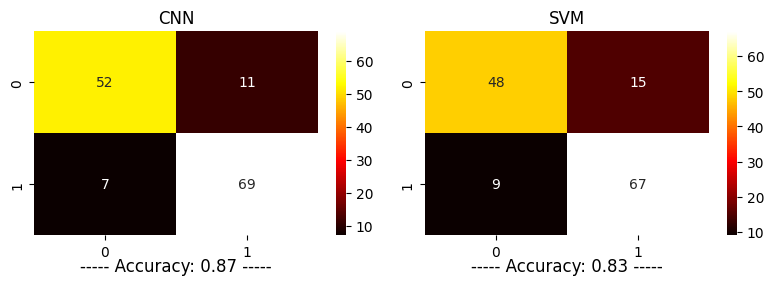

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los modelos
models = {
    "CNN": cnn_model,
    "SVM": svm_model
}

# Diccionario para almacenar predicciones
predictions = {}

# Realizar predicciones y evaluar cada modelo
for name, model in models.items():
    if name == "CNN":
        # Evaluar el modelo CNN
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    elif name == "SVM":
        # Evaluar el modelo SVM
        y_pred = model.predict(X_test_flatten)
        accuracy = accuracy_score(y_test_flatten, y_pred)

    predictions[name] = (accuracy, y_pred)

# Graficar matrices de confusión
_, axes = plt.subplots(1, len(models), figsize=(8, 3))

for i, (name, (accuracy, y_pred)) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap='hot', annot=True, fmt='d', ax=axes[i])

    axes[i].set_title(f"{name}")
    axes[i].text(0.5, -0.15, f'----- Accuracy: {accuracy:.2f} -----',
                 ha='center', va='center', transform=axes[i].transAxes, fontsize=12)

plt.tight_layout()
plt.show()


In [10]:
import joblib

# Ruta de la carpeta donde se guardarán los modelos
save_dir = '/content/drive/MyDrive/Machine learning/Final'

# Guardar el modelo CNN
cnn_model_path = os.path.join(save_dir, 'cnn_model.h5')
cnn_model.save(cnn_model_path)
print(f'Modelo CNN guardado en: {cnn_model_path}')

# Guardar el modelo SVM
svm_model_path = os.path.join(save_dir, 'svm_model.pkl')
joblib.dump(svm_model, svm_model_path)
print(f'Modelo SVM guardado en: {svm_model_path}')


Modelo CNN guardado en: /content/drive/MyDrive/Machine learning/Final/cnn_model.h5
Modelo SVM guardado en: /content/drive/MyDrive/Machine learning/Final/svm_model.pkl


**INTERFACE**

In [11]:
#Implementar gradio para la
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [12]:
import gradio as gr
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import joblib
import numpy as np
import os

# Ruta de la carpeta donde se guardaron los modelos
save_dir = '/content/drive/MyDrive/Machine learning/Final'
cnn_model_path = os.path.join(save_dir, 'cnn_model.h5')
svm_model_path = os.path.join(save_dir, 'svm_model.pkl')

# Cargar modelos
cnn_model = tf.keras.models.load_model(cnn_model_path)
svm_model = joblib.load(svm_model_path)

def preprocess_image(img):
    img = img.resize((64, 64))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalizar
    return img_array

def predict_image(img):
    # Preprocesar la imagen
    img_array = preprocess_image(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predicción con CNN
    cnn_prediction = (cnn_model.predict(img_array_expanded) > 0.5).astype("int32")[0][0]
    cnn_result = "Buena" if cnn_prediction == 0 else "Mala"

    # Preprocesar la imagen para el modelo SVM
    img_array_flatten = img_array.flatten().reshape(1, -1)

    # Predicción con SVM
    svm_prediction = svm_model.predict(img_array_flatten)[0]
    svm_result = "Buena" if svm_prediction == 0 else "Mala"

    return cnn_result, svm_result

demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(label="Predicción CNN"), gr.Textbox(label="Predicción SVM")],
    title="Predicción de calidad de manzanas",
    description="Cargar una imagen de una manzana",
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c0a872ee8ce3017b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
